In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [38]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [39]:
df = pd.read_csv('cut_dns.csv').dropna()

In [53]:
encoder = LabelEncoder()
train_descrs = df["description"][::4]
test_descrs = df["description"][1::8]
train_cats = encoder.fit_transform(df["category_id"][::4])
test_cats = encoder.transform(df["category_id"][1::8])

In [54]:
count_vec = CountVectorizer(max_features=50)
count_train_vecs = count_vec.fit_transform(train_descrs)
count_test_vecs = count_vec.transform(test_descrs)
count_train_vecs

<4084x50 sparse matrix of type '<class 'numpy.int64'>'
	with 15070 stored elements in Compressed Sparse Row format>

In [55]:
tsne = TSNE()

In [56]:
components = tsne.fit_transform(count_train_vecs.toarray())

In [61]:
components

plt.rcParams["figure.figsize"] = (20, 6)

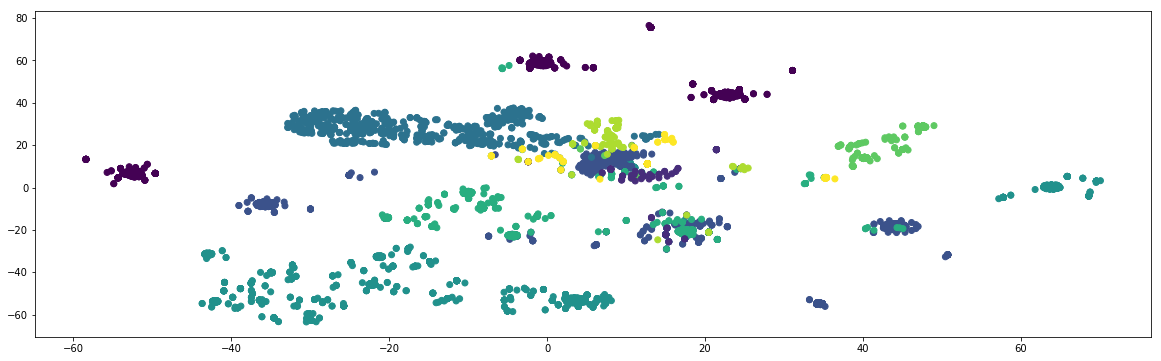

In [62]:
plt.scatter(x=components[:,0], y=components[:,1], c=train_cats)